# Spectrogram

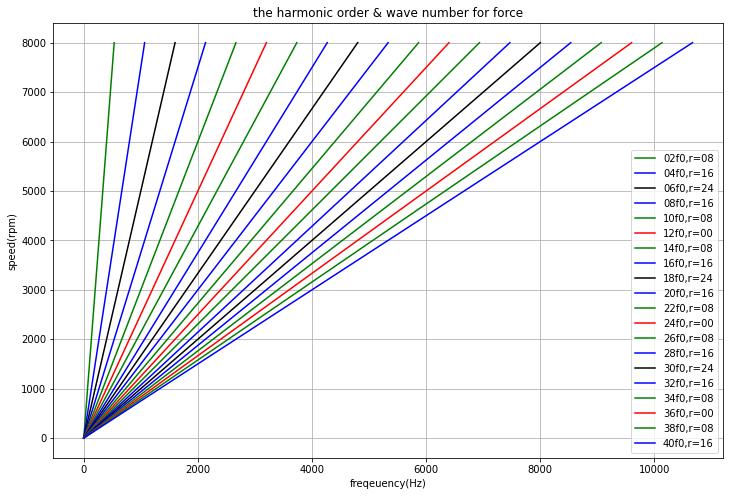

In [56]:
import pandas as pd
import numpy as np
import sympy as sym
import seaborn as sns 
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px

poles=8
slot=48
rpm=8000
u=20
v=20

fre_e=(rpm/60.)*(poles/2)
fre_r=(rpm/60.)
gcd=sym.gcd(poles,slot)

uu=np.arange(1,u+1) #time
vv=np.arange(-v,v+1) #space
uvtable=np.zeros((uu.size,vv.size),dtype='int')
for i in np.arange(uu.size):
    for j in np.arange(vv.size):
        uvtable[i,j]=np.abs(uu[i]*poles+vv[j]*slot)
        # print (i,j,poles,slot,uvtable[i,j])

uvtab=pd.DataFrame(uvtable,columns=vv, index=uu)
# uvtab

# fslot=np.arange(2*fre_e,20000,2*fre_e) #20000Hz까지의 슬롯주파수
fslot=np.arange(1*fre_e,20000,1*fre_e) #20000Hz까지의 슬롯주파수

mmode=np.size(np.unique(np.min(uvtab,1))) 
modnum=np.unique(np.min(uvtab,1))[1] # 0을 제외한 두번째 작은값을 
color=['r','g','b','k','c','m','y'] #컬러리스트를 만든다.

#가장 작은 파수를 가지고 시간차수에 대해 찾는다.

aa=np.unique(np.min(uvtab,1))
bb=np.array(np.min(uvtable,1))

# print(aa)
# print(bb)


pcc=[]
for i in bb:
    for j in range(aa.size):
        if i==aa[j]:
            pcc.append(j)
pcc=np.array(pcc)
# bb




plt.figure(figsize=(12,8))
for i in np.arange(fslot.size):
       if i<=u-1:
            plt.plot([0,fslot[i]],[0, rpm], color[pcc[i]], label='%02df0,r=%02d'% ((i+1)*2, bb[i]))
#plt.plot([1600,1600],[0,rpm])
#plt.plot([9000,9000],[0,rpm])
plt.title(u'the harmonic order & wave number for force')
plt.ylabel(u'speed(rpm)')
plt.xlabel(u'freqeuency(Hz)')
plt.grid('on')
plt.legend()


## 코드 뜯보기

In [12]:
import pandas as pd
import numpy as np
import sympy as sym
import seaborn as sns 
import matplotlib as plt
import matplotlib.pyplot as plt
import plotly.express as px

poles=8
slot=48
rpm=8000
u=20
v=20

fre_e=(rpm/60.)*(poles/2) # 전기 동작 주파수 기본파 (fe) 
fre_r=(rpm/60.)  # 기계적 회전주파수 (frot)
gcd=sym.gcd(poles,slot)

uu=np.arange(1,u+1) #time order 
r=np.arange(-v,v+1) #space order


uvtable=np.zeros((uu.size,r.size),dtype='int')
for i in np.arange(uu.size):
    for j in np.arange(r.size):
        uvtable[i,j]=np.abs(uu[i]*poles+r[j]*slot) # 무슨의미인지요
        # print (i,j,poles,slot,uvtable[i,j])

## uvtab

In [13]:
uvtab=pd.DataFrame(uvtable,columns=r, index=uu)
# uvtab

fslot=np.arange(2*fre_e,20000,2*fre_e) #20000Hz까지의 슬롯주파수
mmode=np.size(np.unique(np.min(uvtab,1))) #출력 mode 개수
modnum=np.unique(np.min(uvtab,1))[1] # 0을 제외한 두번째 작은값을 
color=['r','g','b','k','c','m','y'] #컬러리스트를 만든다.

## 열별로 min 값 찾기 (in uvtab, uvtable)

In [33]:
r_sort=np.min(uvtab,1) # 각 시간차수(열별로)에 대해서 최소값 찾기
r_list=np.unique(aaa) # 해당 차수만 찾아내기

r_sor_table=np.min(uvtable,1) # uvtable 에서 열별로 최소값 찾기
r_array=np.array(np.min(uvtable,1)) # 위에랑 똑같은데


In [34]:
#가장 작은 파수(wavenumber)를 가지고 시간차수에 대해 찾는다.

aa=np.unique(np.min(uvtab,1)) # 시간차수별 가장 작은 공간차수 
bb=np.array(np.min(uvtable,1)) # 

# print(aa)
# print(bb)


pcc=[]
for i in bb: ## 
    for j in range(aa.size): #파수
        if i==aa[j]:
            pcc.append(j)
pcc=np.array(pcc)
# bb



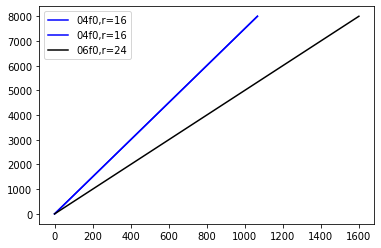

In [54]:
plt.plot([0,fslot[1]],[0,rpm], color[pcc[1]], label='%02df0,r=%02d'% ((1+1)*2, bb[1]))
plt.plot([0,fslot[1]],[0,rpm], color[pcc[1]], label='%02df0,r=%02d'% ((1+1)*2, bb[1]))

plt.plot([0,fslot[2]],[0,rpm], color[pcc[2]], label='%02df0,r=%02d'% ((2+1)*2, bb[2]))
plt.legend()


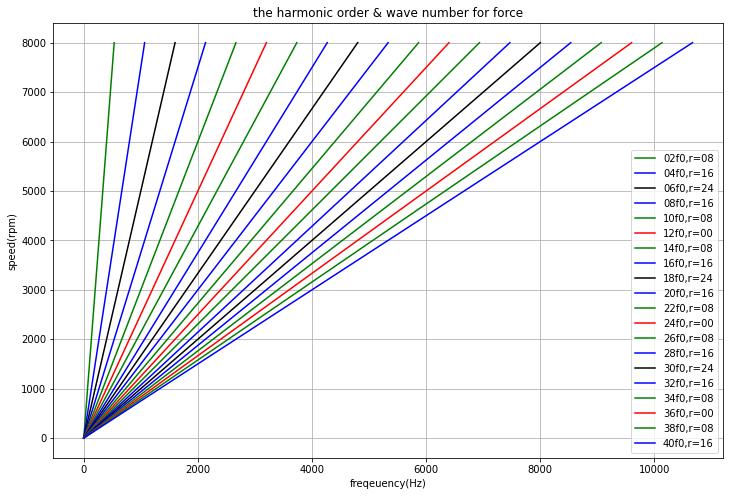

In [55]:
plt.figure(figsize=(12,8))
fslot=np.arange(1*fre_e,20000,1*fre_e) #20000Hz까지의 슬롯주파수

for i in np.arange(fslot.size):
       if i<=u-1:
            plt.plot([0,fslot[i]],[0, rpm], color[pcc[i]], label='%02df0,r=%02d'% ((i+1)*2, bb[i]))
#plt.plot([1600,1600],[0,rpm])
#plt.plot([9000,9000],[0,rpm])
plt.title(u'the harmonic order & wave number for force')
plt.ylabel(u'speed(rpm)')
plt.xlabel(u'freqeuency(Hz)')
plt.grid('on')
plt.legend()

# 차수정보

In [62]:
#가장 작은 파수를 가지는 차수들
low_ord=np.argwhere(bb==aa[1]).ravel()+1
print ('가장 저차를 갖는 주파수 차수:',low_ord*2)

#concern_rpm
rrpm=7500
fre_e=(rrpm/60.)*poles/2
# print(fre_e)
print ('가장 저차 파수를 갖는 주파수:', fre_e*low_ord*2)
print ('코깅주파수', rrpm*sym.lcm(poles,slot)/60)
print ('슬롯하모닉에 주파수:', fre_e*slot)


#x=np.arange(-1,1,0.1)
#y=np.arange(-1,1,0.1)
#X,Y=np.meshgrid(x,y)
#Z=np.exp(-(X**2+Y**2))
#CS=plt.contourf(X,Y,Z)



가장 저차를 갖는 주파수 차수: [ 2 10 14 22 26 34 38]
가장 저차 파수를 갖는 주파수: [ 1000.  5000.  7000. 11000. 13000. 17000. 19000.]
코깅주파수 6000
슬롯하모닉에 주파수: 24000.0


# 2D FFT 
## B plot

/var/folders/3j/h_3wwq996wg6rrmqrfscpws80000gn/T/ipykernel_959/2616753521.py:22: UserWarning:

The following kwargs were not used by contour: 'zdir', 'offset'

findfont: Font family ['Malgun Gothic'] not found. Falling back to DejaVu Sans.


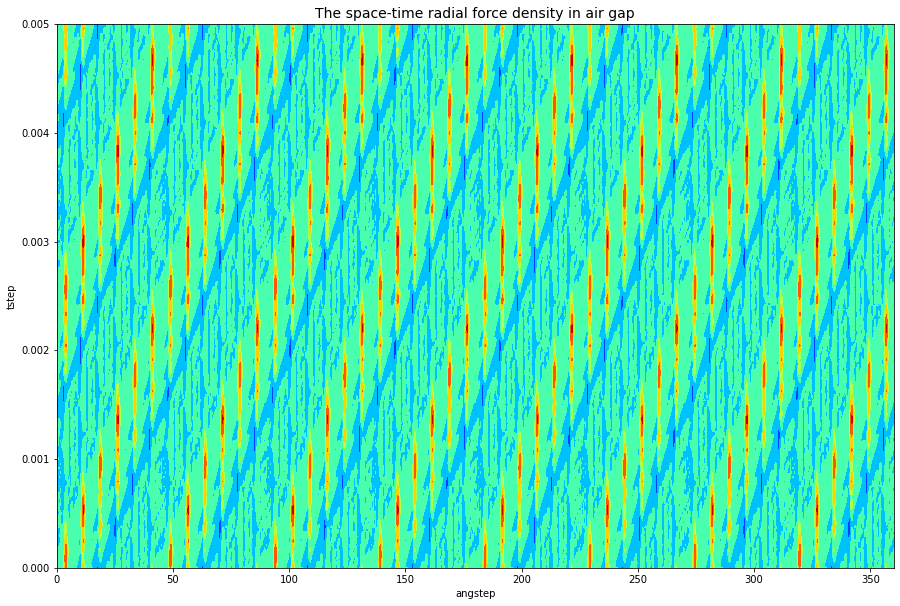

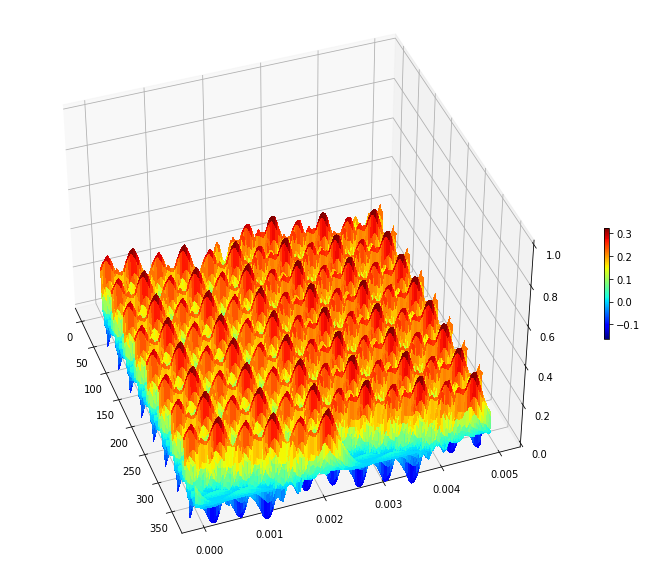

In [60]:
from matplotlib import cm
import pandas as pd
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode 
init_notebook_mode() 

C=pd.read_csv("/Users/kdh2021-air/gitnvh_py/19_ElecBus/Output/153.9Nm@7500rpm_tangential_Force.csv")

#atemp_before=C.columns[0]
C.rename(columns={'0':'index1'},inplace=True)
#atemp_after=C.columns[0]
C.set_index('index1',inplace=True)
C.style.hide_index()



nrow=len(C)
ncol=C.shape[1]
X,Y= np.meshgrid(np.linspace(0,360,nrow), np.linspace(0,0.005,ncol))
fig, ax=plt.subplots()
fig.set_size_inches((15,10))
cset=ax.contourf(X,Y,C.T,zdir='z',offset=0,cmap=cm.jet)
ax.set_xlabel('angstep')
ax.set_ylabel('tstep')
plt.title(u'The space-time radial force density in air gap', fontproperties='Malgun Gothic', fontsize=14)
plt.show()

fig=plt.figure(figsize=(12,8))
ax=fig.add_subplot(1,1,1,projection='3d')
g=ax.plot_surface(X,Y,C.T/100.,rstride=1,cstride=1,antialiased=False,alpha=1,cmap='jet')
ax.view_init(40,-20)
ax.set_zlim([0,1])
fig.tight_layout()
plt.colorbar(g,shrink=0.2)
plt.show()

#x=C['']
#y=C['']
#z=C['']
#fig1 = go.Figure(data=[go.Surface(z=z, x=x, y=y)])
#fig1.update_layout( )
#fig1.update_layout(title='Radial flux density in the airgap over time and angle',
         #
    # autosize=True,
        #          scene = dict(
       #               xaxis_title='Angle [°]',
      #                yaxis_title='Time [s]',
     #                 zaxis_title='Flux [T]'
    #              ),
   #               width=700,
  #                margin=dict(r=20, b=100, l=10, t=100),
 #                )

#fig1.show(config = {"displaylogo":False})

## B 2d FFT

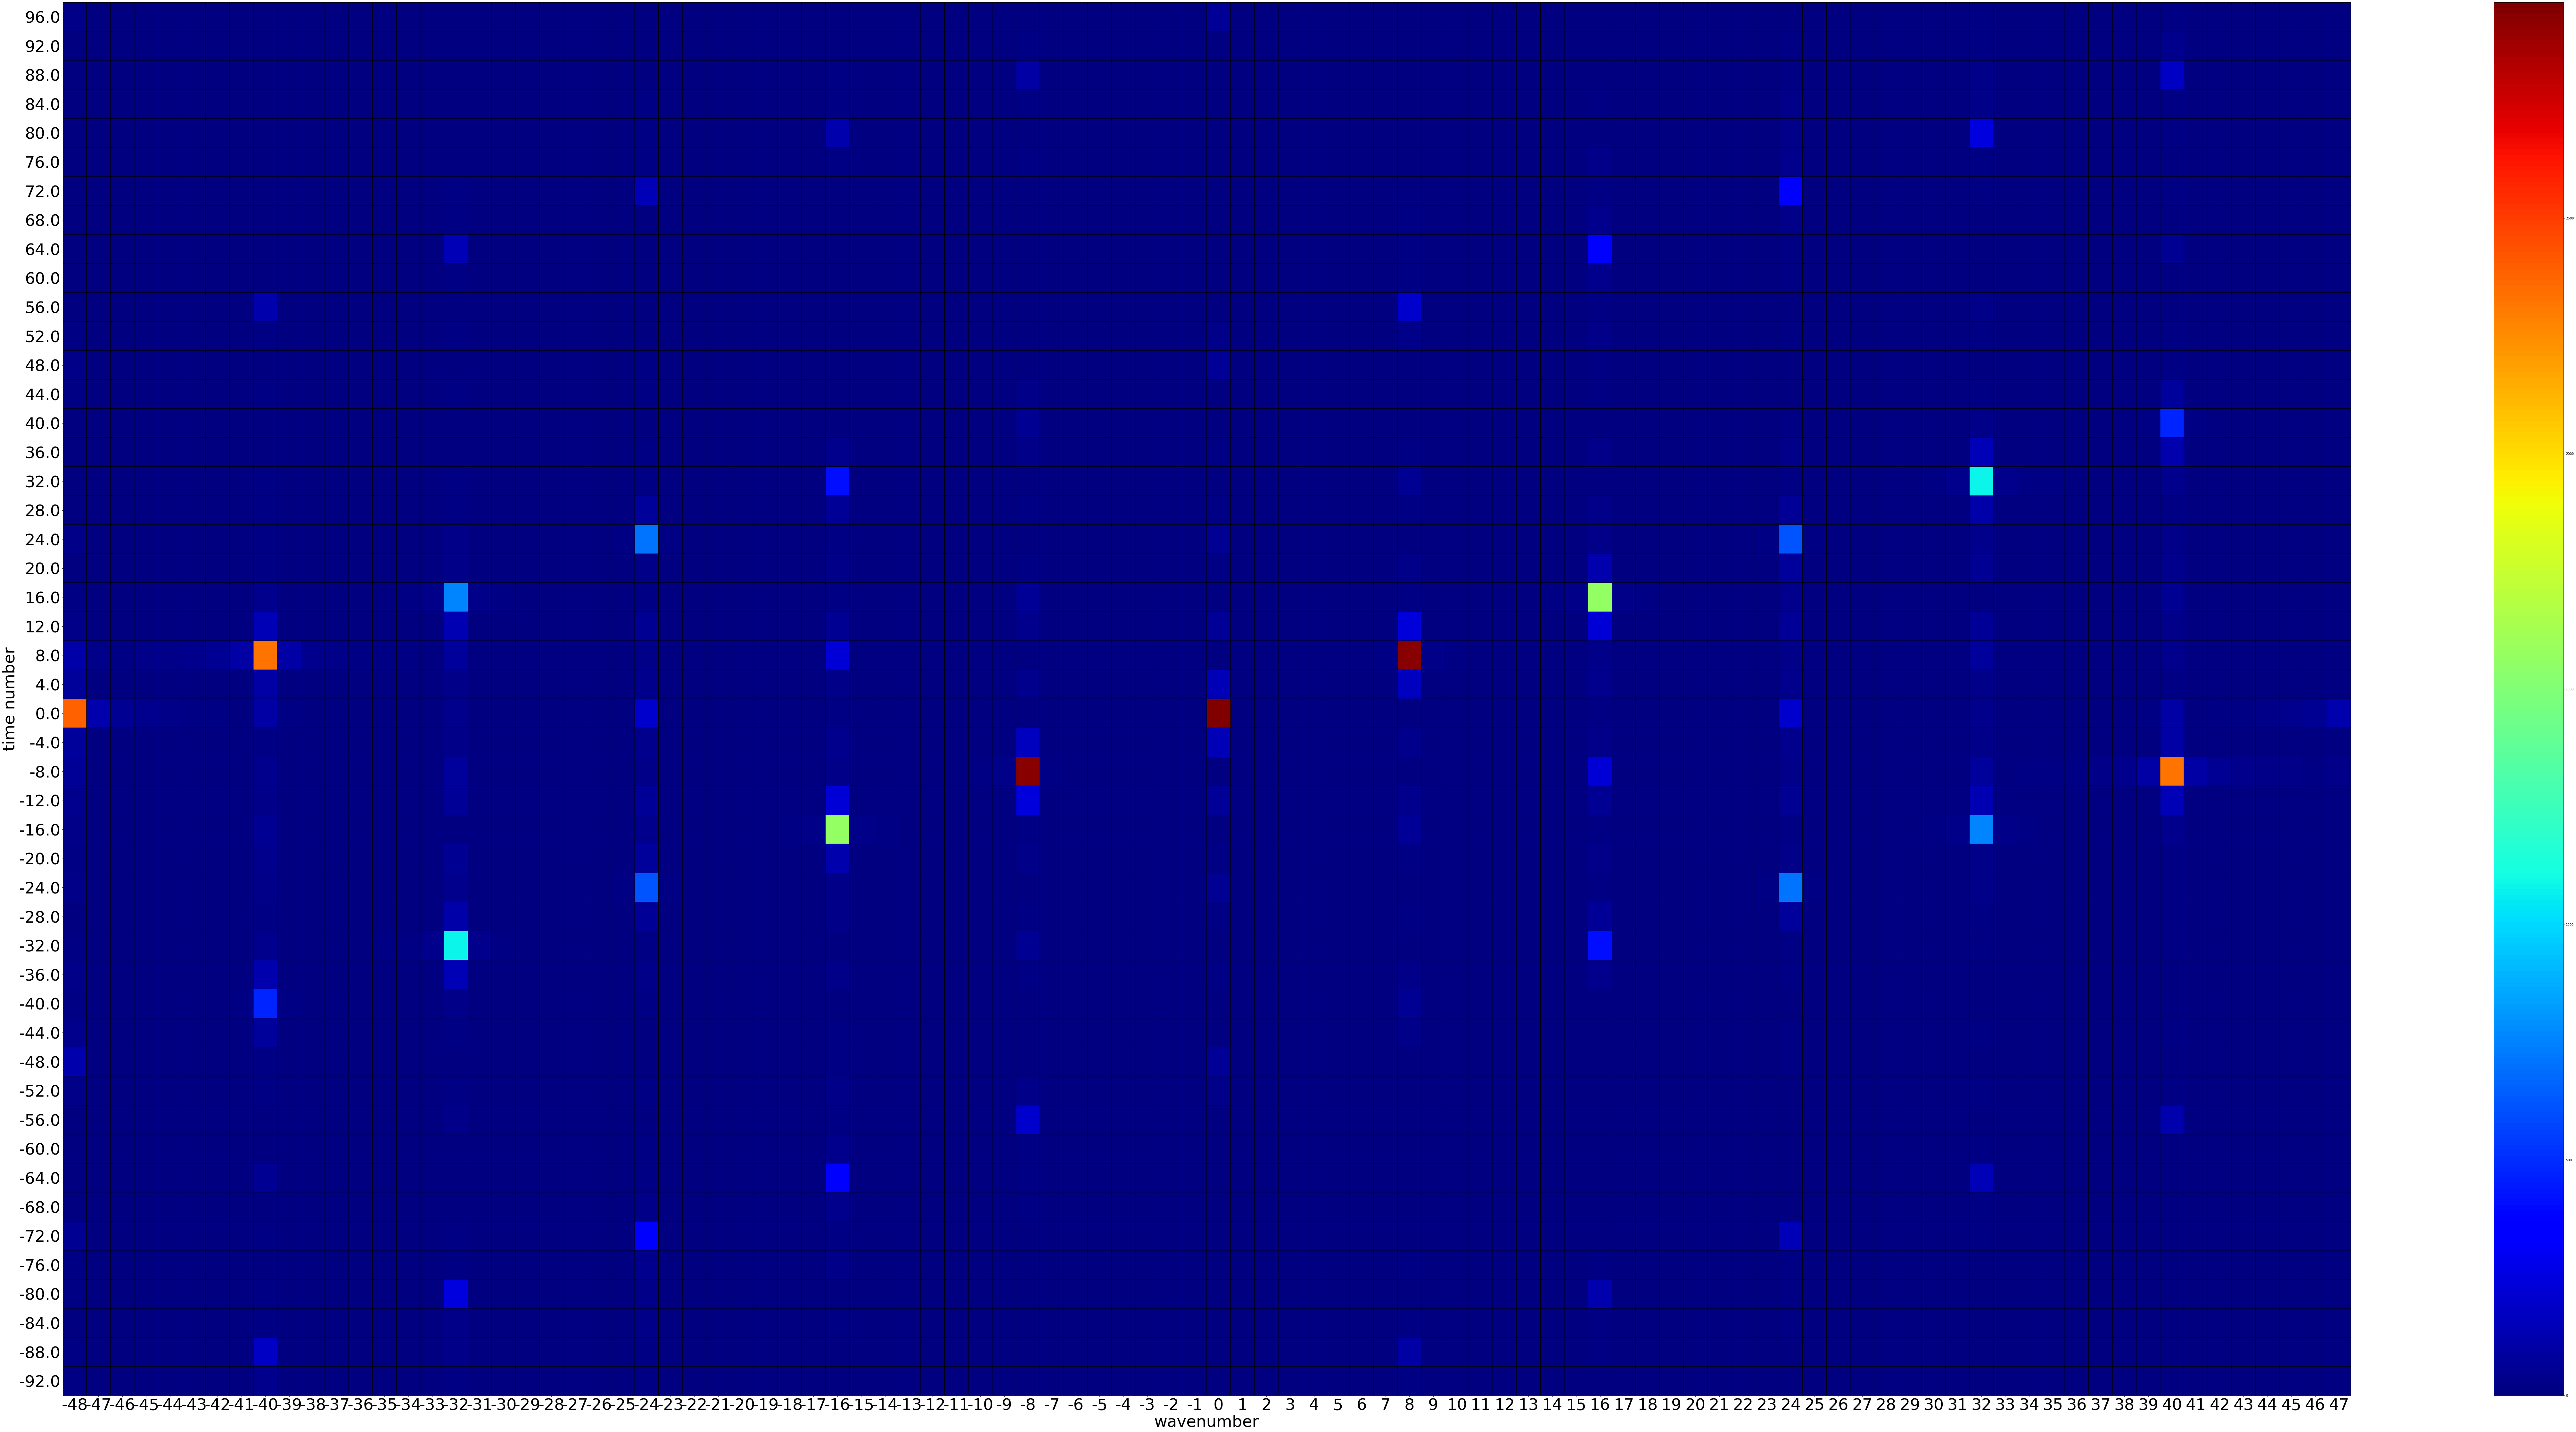

In [69]:
#2d FFT for the time-spatial radial force density
import numpy as np

ps=C.T
#atemp_show=ps.head()
#type_show=ps.dtypes
#atemp_fftn=np.fft.fftn(ps)
#atemp_abs_fftn=abs(np.fft.fftn(ps))


ffs=np.fft.fftshift(abs(np.fft.fftn(ps)))*2/len(ps)

#fftn :discrete fft
# fftshift 파수가 0인 부분을 정중앙에 위치시키고 재배열
#ffst는 주파수의 array
#leng_temp=len(ps)

Nx,Nt=ffs.shape
#Nnx,Nnt=ffs.shape
#shape (numpy) : 행렬의 차원 
Nx=int(Nx); Nt=int(Nt) #굳이?

waveno=48
timeno=24

f=np.fft.fftshift(np.fft.fftfreq(Nx,1/Nx)) # 시간 fft
f.astype(int)

k=np.fft.fftshift(np.fft.fftfreq(Nt,1/Nt)) # 공간상 fft

#0이 아닌 배열 요소의 색인을 요소별로 그룹화하십시오.
fcent=int(np.argwhere(f==0))
kcent=int(np.argwhere(k==0))

ff=f[fcent-timeno:fcent+timeno]
kk=k[kcent-waveno:kcent+waveno]
#지정한 wavenumber와 timenumber에 대해서만 frame 생성
#atemp_ff=ff[-2]
#atemp_aaa=np.arange()
aaa=-np.arange(ff[0],ff[-1]+1,dtype=np.int64)*poles/2 #  극수 곱하기
#[-1]은 끝에서 첫번째 값, -붙여서 순서가 바뀌게 되었네
bbb=np.arange(kk[0],kk[-1]+1,dtype=np.int64)

##이게 포인트인가
sffs=ffs[fcent-timeno:fcent+timeno,kcent-waveno:kcent+waveno]
#atemp_start=kcent-waveno
#atemp_lst=kcent+waveno
#atemp_b=ffs[-120,0]
sffs[sffs<0.1]=0 


fig, ax =plt.subplots()
fig.set_size_inches((160,80))
ax.set_xticks(np.arange(kk.size)+0.5)
ax.set_xticklabels(bbb,fontsize=50)
ax.set_yticks(np.arange(ff.size)+0.5)
ax.set_yticklabels(aaa,fontsize=50)
plt.pcolor(sffs,edgecolors='k', linewidth=1,cmap=cm.jet,) #,cmap='tab20'
plt.xlabel('wavenumber',fontsize=50)
plt.ylabel('time number', fontsize=50)

plt.gca().invert_yaxis()
plt.colorbar()
plt.show()






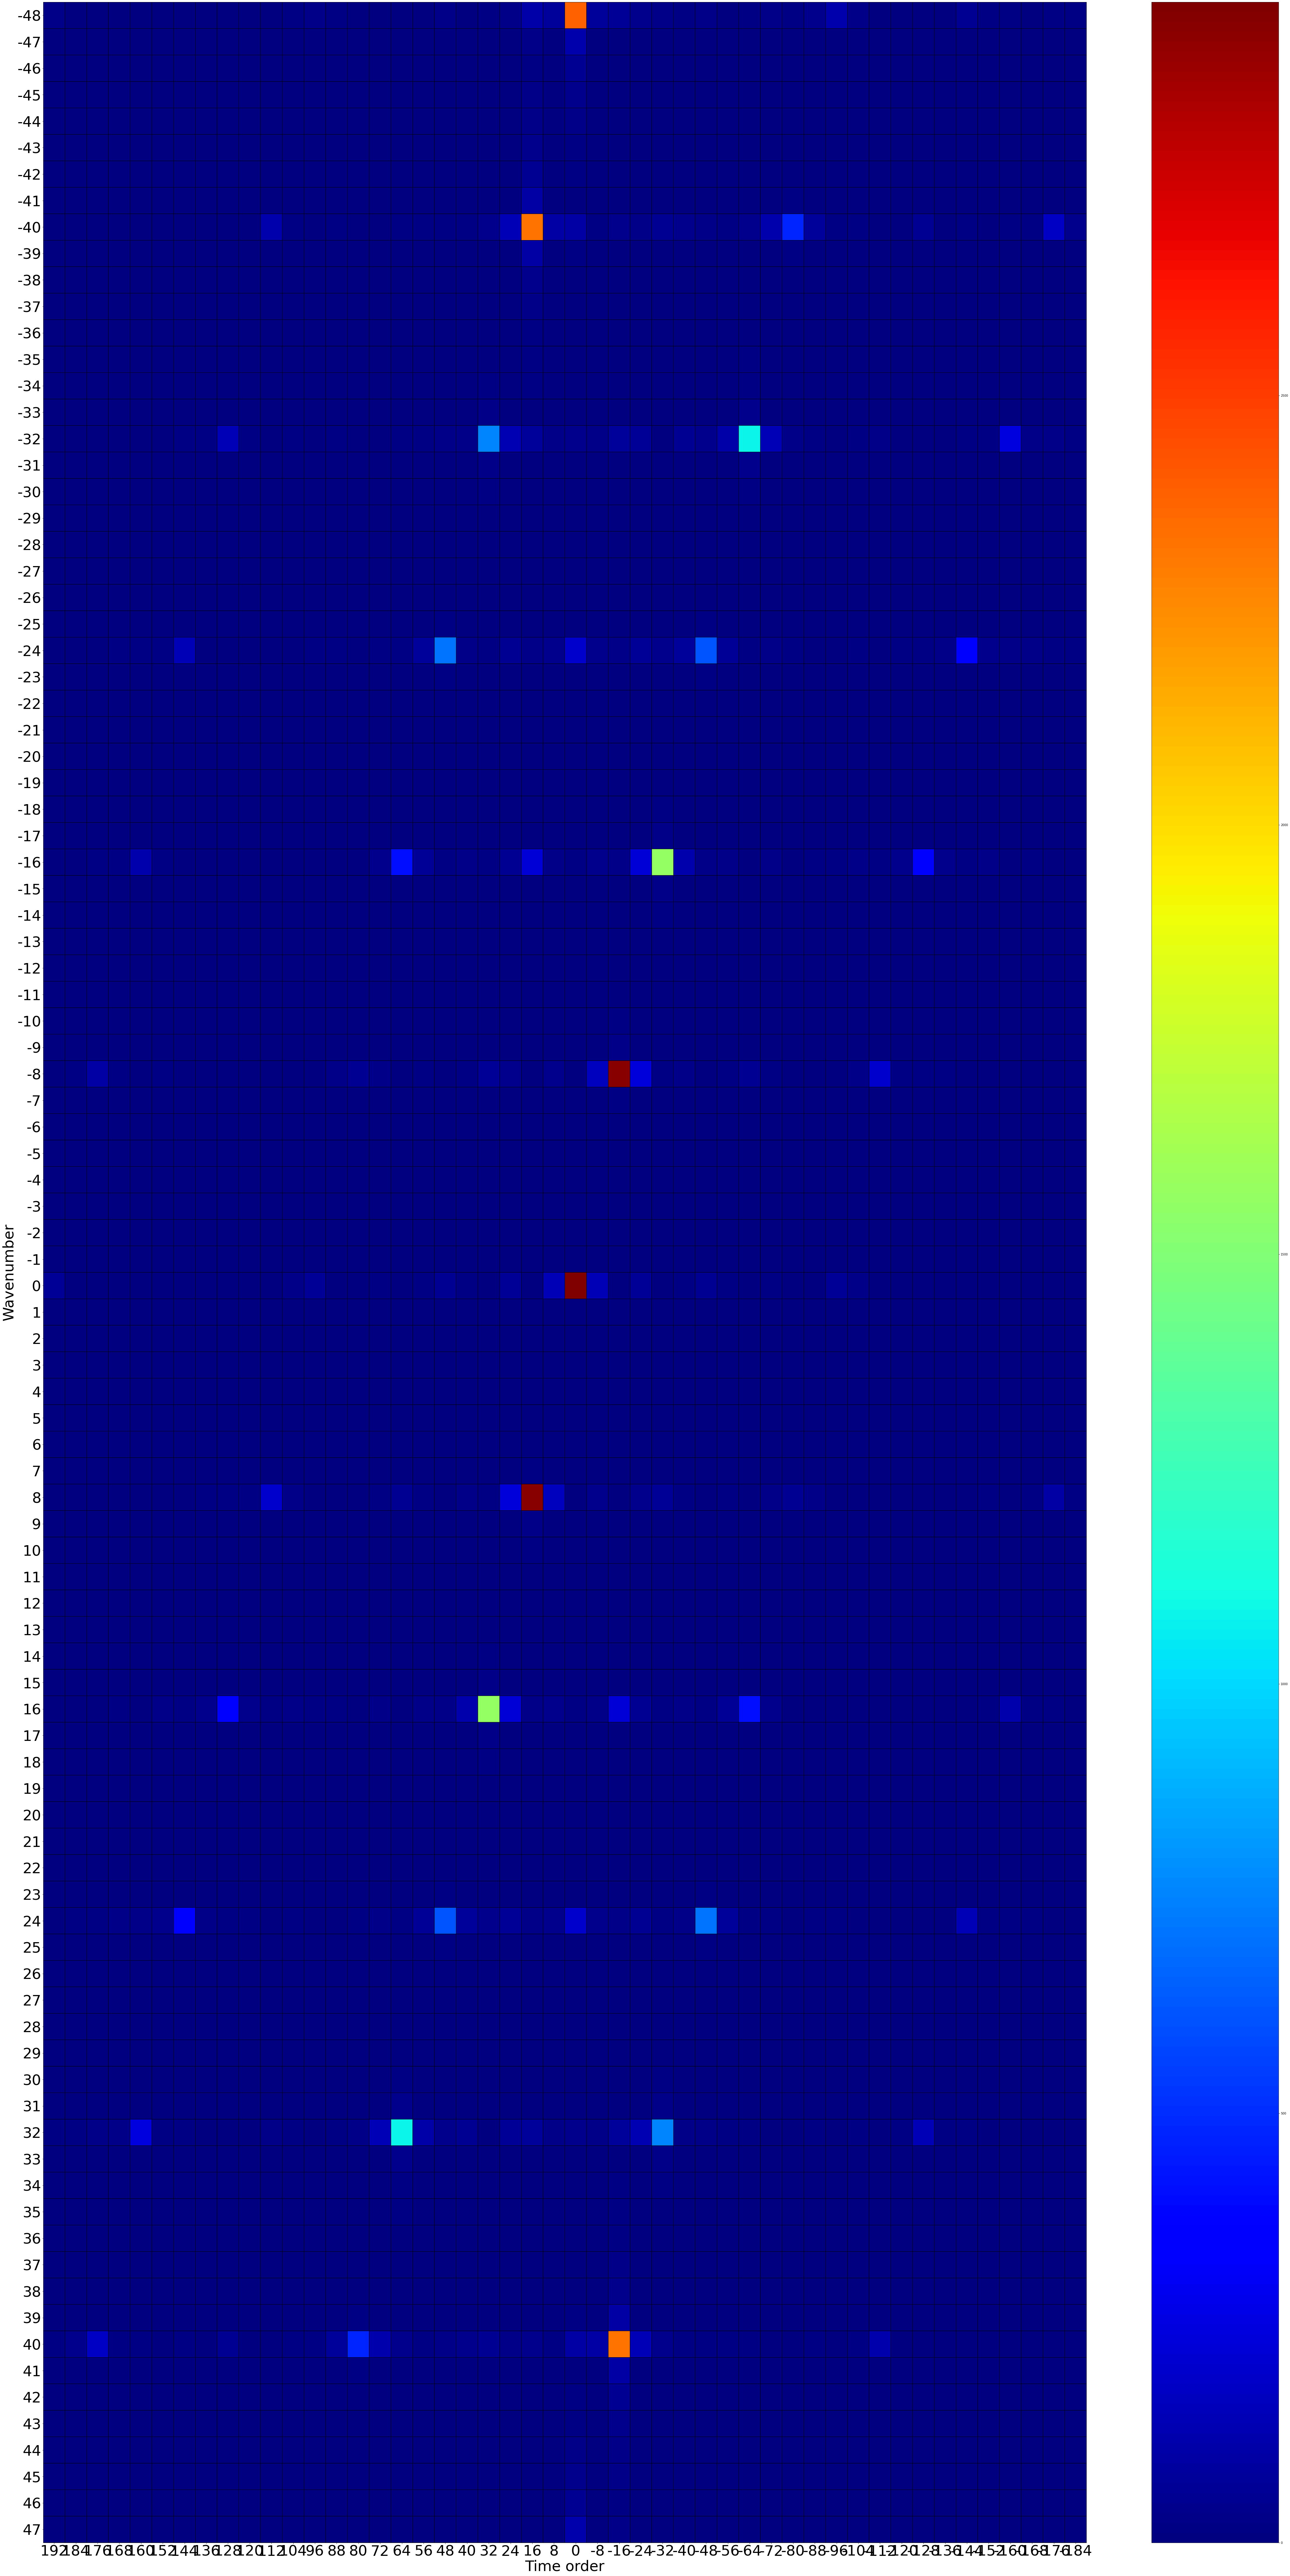

In [68]:

fig, ax =plt.subplots()
fig.set_size_inches((80,160))
ax.set_xticks(np.arange(ff.size)+0.5)
ax.set_xticklabels(aaa,fontsize=50)
ax.set_yticks(np.arange(kk.size)+0.5)
ax.set_yticklabels(bbb,fontsize=50)

plt.pcolor(sffs.T,edgecolors='k', linewidth=1,cmap=cm.jet,) #,cmap='tab20'
plt.xlabel('Time order',fontsize=50)
plt.ylabel('Wavenumber', fontsize=50)

plt.gca().invert_yaxis()
plt.colorbar()
plt.show()